In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
df=pd.read_csv('Counties_symp_death_policy.csv')

In [3]:
df.head()

,date,state_code_x,fips,gender,age_bucket,n,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,...,is_otherbusinessclose,is_publicmask,is_quarantine,is_restaurantrestrict,is_schoolclose,is_schoolhealthsafety,is_stayathome,is_travelrestrictentry,is_travelrestrictexit,is_travelrestrictintra
0,2020-04-13,al,1003,overall,overall,60,1.6667,1.6667,1.6667,1.6667,...,1,0,0,1,1,0,1,0,0,0
1,2020-04-14,al,1003,overall,overall,68,0.0000,0.0000,0.0000,1.4925,...,1,0,0,1,1,0,1,0,0,0
2,2020-04-15,al,1003,female,overall,51,0.0000,0.0000,1.9608,0.0000,...,1,0,0,1,1,0,1,0,0,0
3,2020-04-15,al,1003,overall,overall,64,0.0000,0.0000,3.1746,0.0000,...,1,0,0,1,1,0,1,0,0,0
4,2020-04-16,al,1003,overall,overall,61,3.2787,3.2787,3.2787,3.2787,...,1,0,0,1,1,0,1,0,0,0


In [4]:
list(df.columns)

['date',
 'state_code_x',
 'fips',
 'gender',
 'age_bucket',
 'n',
 'pct_cli',
 'pct_ili',
 'pct_cli_anosmia_ageusia',
 'pct_hh_cli',
 'pct_cmnty_cli',
 'pct_hh_fever',
 'pct_hh_sore_throat',
 'pct_hh_cough',
 'pct_hh_shortness_of_breath',
 'pct_hh_difficulty_breathing',
 'mean_hh_cli_ct',
 'mean_cmnty_cli_ct',
 'pct_self_fever',
 'pct_self_cough',
 'pct_self_shortness_of_breath',
 'pct_self_difficulty_breathing',
 'pct_self_tiredness_or_exhaustion',
 'pct_self_nasal_congestion',
 'pct_self_runny_nose',
 'pct_self_muscle_joint_aches',
 'pct_self_sore_throat',
 'pct_self_persistent_pain_pressure_in_chest',
 'pct_self_nausea_vomiting',
 'pct_self_diarrhea',
 'pct_self_anosmia_ageusia',
 'pct_self_other',
 'pct_self_none_of_above',
 'pct_self_multiple_symptoms',
 'pct_tested_and_positive',
 'pct_tested_and_negative',
 'pct_tested_no_result',
 'pct_could_not_get_tested',
 'pct_did_not_try_to_get_tested',
 'pct_worked_outside_home',
 'pct_avoid_contact_all_or_most_time',
 'mean_outside_hh_c

In [5]:
df1=df[[
 'date',
 'state_code_x',
 'fips',
 'is_barrestrict',
 'is_businesshealthsafety',
 'is_caseisolation',
 'is_emergdec',
 'is_gathrecom',
 'is_gathrestrict',
 'is_nebusinessclose',
 'is_otherbusinessclose',
 'is_publicmask',
 'is_quarantine',
 'is_restaurantrestrict',
 'is_schoolclose',
 'is_schoolhealthsafety',
 'is_stayathome',
 'is_travelrestrictentry',
 'is_travelrestrictexit',
 'is_travelrestrictintra',
 'pct_tested_and_positive_weighted'
]]

In [6]:
df1.head()

,date,state_code_x,fips,is_barrestrict,is_businesshealthsafety,is_caseisolation,is_emergdec,is_gathrecom,is_gathrestrict,is_nebusinessclose,...,is_publicmask,is_quarantine,is_restaurantrestrict,is_schoolclose,is_schoolhealthsafety,is_stayathome,is_travelrestrictentry,is_travelrestrictexit,is_travelrestrictintra,pct_tested_and_positive_weighted
0,2020-04-13,al,1003,1,1,1,1,0,1,0,...,0,0,1,1,0,1,0,0,0,1.7005
1,2020-04-14,al,1003,1,1,1,1,0,1,0,...,0,0,1,1,0,1,0,0,0,0.0000
2,2020-04-15,al,1003,1,1,1,1,0,1,0,...,0,0,1,1,0,1,0,0,0,0.0000
3,2020-04-15,al,1003,1,1,1,1,0,1,0,...,0,0,1,1,0,1,0,0,0,0.0000
4,2020-04-16,al,1003,1,1,1,1,0,1,0,...,0,0,1,1,0,1,0,0,0,0.0000


In [7]:
df1.describe()

,fips,is_barrestrict,is_businesshealthsafety,is_caseisolation,is_emergdec,is_gathrecom,is_gathrestrict,is_nebusinessclose,is_otherbusinessclose,is_publicmask,is_quarantine,is_restaurantrestrict,is_schoolclose,is_schoolhealthsafety,is_stayathome,is_travelrestrictentry,is_travelrestrictexit,is_travelrestrictintra,pct_tested_and_positive_weighted
count,100292.000000,100292.000000,100292.000000,100292.000000,100292.0,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.00000,100292.000000
mean,27713.157161,0.989301,0.762733,0.144418,1.0,0.655297,0.933574,0.641248,0.968362,0.832100,0.422985,0.998983,0.994017,0.251914,0.985413,0.060603,0.006750,0.00688,0.558081
std,15861.206802,0.102881,0.425410,0.351515,0.0,0.475274,0.249027,0.479637,0.175034,0.373779,0.494036,0.031875,0.077115,0.434115,0.119895,0.238602,0.081883,0.08266,1.069513
min,1003.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,12086.000000,1.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,27053.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,42003.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.822600
max,56025.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,19.884500


In [8]:
df2=df1.groupby(['date','state_code_x','fips']).mean()
df2=df2.sort_values(by=['state_code_x','fips','date'])
df2=df2.reset_index()
df2.head()

,date,state_code_x,fips,is_barrestrict,is_businesshealthsafety,is_caseisolation,is_emergdec,is_gathrecom,is_gathrestrict,is_nebusinessclose,...,is_publicmask,is_quarantine,is_restaurantrestrict,is_schoolclose,is_schoolhealthsafety,is_stayathome,is_travelrestrictentry,is_travelrestrictexit,is_travelrestrictintra,pct_tested_and_positive_weighted
0,2020-04-13,ak,2020,1,0,0,1,0,1,1,...,1,1,1,1,0,1,0,0,1,0.0
1,2020-04-14,ak,2020,1,0,0,1,0,1,1,...,1,1,1,1,0,1,0,0,1,0.0
2,2020-04-15,ak,2020,1,0,0,1,0,1,1,...,1,1,1,1,0,1,0,0,1,0.0
3,2020-04-16,ak,2020,1,0,0,1,0,1,1,...,1,1,1,1,0,1,0,0,1,0.0
4,2020-04-20,ak,2020,1,0,0,1,0,1,1,...,1,1,1,1,0,1,0,0,1,0.0


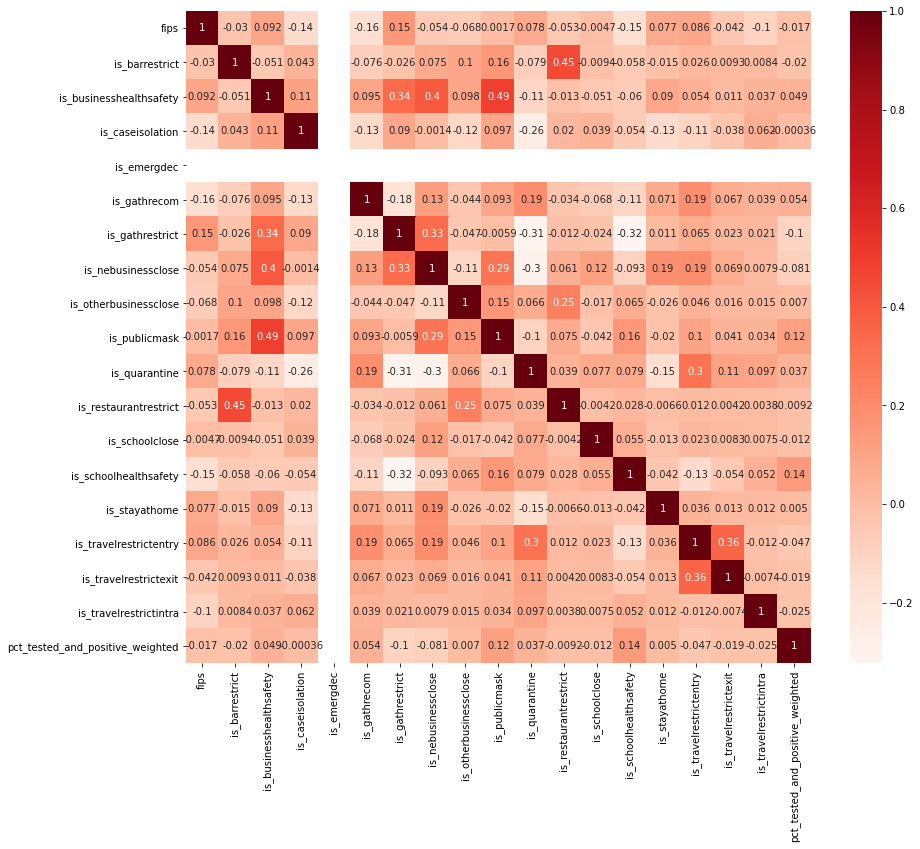

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(14,12))
cor = df2.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [10]:
max_lag=30
symptoms=[
 'is_barrestrict',
 'is_businesshealthsafety',
 'is_caseisolation',
 'is_emergdec',
 'is_gathrecom',
 'is_gathrestrict',
 'is_nebusinessclose',
 'is_otherbusinessclose',
 'is_publicmask',
 'is_quarantine',
 'is_restaurantrestrict',
 'is_schoolclose',
 'is_schoolhealthsafety',
 'is_stayathome',
 'is_travelrestrictentry',
 'is_travelrestrictexit',
 'is_travelrestrictintra',
 'pct_tested_and_positive_weighted'
]
lagged_correlation = pd.DataFrame.from_dict(
    {x: [df2['pct_tested_and_positive_weighted'].corr(df2[x].shift(-t)) for t in range(max_lag)] for x in symptoms})

In [11]:
lagged_correlation.head(20)

,is_barrestrict,is_businesshealthsafety,is_caseisolation,is_emergdec,is_gathrecom,is_gathrestrict,is_nebusinessclose,is_otherbusinessclose,is_publicmask,is_quarantine,is_restaurantrestrict,is_schoolclose,is_schoolhealthsafety,is_stayathome,is_travelrestrictentry,is_travelrestrictexit,is_travelrestrictintra,pct_tested_and_positive_weighted
0,-0.020464,0.048984,-0.000361,NaN,0.053553,-0.099923,-0.080891,0.006979,0.120667,0.037018,-0.009163,-0.011898,0.138757,0.004976,-0.046712,-0.019208,-0.025092,1.000000
1,-0.019032,0.041078,-0.002537,NaN,0.051476,-0.092838,-0.079803,0.004653,0.109455,0.036624,-0.008474,-0.009278,0.132380,0.002646,-0.047681,-0.018785,-0.023470,0.261759
2,-0.018543,0.033151,-0.003786,NaN,0.048205,-0.086706,-0.078768,0.002031,0.099910,0.036997,-0.009159,-0.005440,0.127377,0.000346,-0.048189,-0.018786,-0.022279,0.251005
3,-0.017982,0.027199,-0.003400,NaN,0.044619,-0.079480,-0.078740,0.003403,0.089065,0.037104,-0.009776,-0.004181,0.123846,-0.000298,-0.048334,-0.018787,-0.023409,0.243487
4,-0.017912,0.020709,-0.004224,NaN,0.042845,-0.074446,-0.078537,0.000078,0.081807,0.037583,-0.010573,-0.001138,0.120017,-0.001519,-0.048624,-0.018451,-0.023480,0.234647
5,-0.017474,0.017112,-0.004256,NaN,0.040688,-0.067306,-0.078445,0.000483,0.073435,0.038964,-0.010573,0.000282,0.116336,-0.003563,-0.048468,-0.018453,-0.024043,0.235442
6,-0.016499,0.012618,-0.004235,NaN,0.038479,-0.063751,-0.078009,-0.000938,0.064114,0.038082,-0.011958,0.000490,0.111247,-0.003114,-0.047997,-0.018454,-0.024286,0.231457
7,-0.016322,0.010094,-0.004885,NaN,0.035295,-0.057224,-0.077792,-0.000633,0.054633,0.038465,-0.011957,0.001465,0.104829,-0.002763,-0.048242,-0.018455,-0.024514,0.230350
8,-0.013631,0.006353,-0.005737,NaN,0.033200,-0.053858,-0.077546,-0.003246,0.049439,0.039259,-0.011958,0.001761,0.099790,-0.004423,-0.048088,-0.017902,-0.024544,0.220341
9,-0.012717,0.003002,-0.005669,NaN,0.030907,-0.050763,-0.077229,-0.003091,0.045300,0.040349,-0.011957,0.004696,0.097125,-0.005286,-0.048511,-0.018242,-0.024429,0.203736


In [12]:
import seaborn as sns
cm = sns.light_palette("red", as_cmap=True)
s = lagged_correlation.style.background_gradient(cmap=cm)
s

/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,is_barrestrict,is_businesshealthsafety,is_caseisolation,is_emergdec,is_gathrecom,is_gathrestrict,is_nebusinessclose,is_otherbusinessclose,is_publicmask,is_quarantine,is_restaurantrestrict,is_schoolclose,is_schoolhealthsafety,is_stayathome,is_travelrestrictentry,is_travelrestrictexit,is_travelrestrictintra,pct_tested_and_positive_weighted
0,-0.020464,0.048984,-0.000361,nan,0.053553,-0.099923,-0.080891,0.006979,0.120667,0.037018,-0.009163,-0.011898,0.138757,0.004976,-0.046712,-0.019208,-0.025092,1.000000
1,-0.019032,0.041078,-0.002537,nan,0.051476,-0.092838,-0.079803,0.004653,0.109455,0.036624,-0.008474,-0.009278,0.132380,0.002646,-0.047681,-0.018785,-0.023470,0.261759
2,-0.018543,0.033151,-0.003786,nan,0.048205,-0.086706,-0.078768,0.002031,0.099910,0.036997,-0.009159,-0.005440,0.127377,0.000346,-0.048189,-0.018786,-0.022279,0.251005
3,-0.017982,0.027199,-0.003400,nan,0.044619,-0.079480,-0.078740,0.003403,0.089065,0.037104,-0.009776,-0.004181,0.123846,-0.000298,-0.048334,-0.018787,-0.023409,0.243487
4,-0.017912,0.020709,-0.004224,nan,0.042845,-0.074446,-0.078537,0.000078,0.081807,0.037583,-0.010573,-0.001138,0.120017,-0.001519,-0.048624,-0.018451,-0.023480,0.234647
5,-0.017474,0.017112,-0.004256,nan,0.040688,-0.067306,-0.078445,0.000483,0.073435,0.038964,-0.010573,0.000282,0.116336,-0.003563,-0.048468,-0.018453,-0.024043,0.235442
6,-0.016499,0.012618,-0.004235,nan,0.038479,-0.063751,-0.078009,-0.000938,0.064114,0.038082,-0.011958,0.000490,0.111247,-0.003114,-0.047997,-0.018454,-0.024286,0.231457
7,-0.016322,0.010094,-0.004885,nan,0.035295,-0.057224,-0.077792,-0.000633,0.054633,0.038465,-0.011957,0.001465,0.104829,-0.002763,-0.048242,-0.018455,-0.024514,0.230350
8,-0.013631,0.006353,-0.005737,nan,0.033200,-0.053858,-0.077546,-0.003246,0.049439,0.039259,-0.011958,0.001761,0.099790,-0.004423,-0.048088,-0.017902,-0.024544,0.220341
9,-0.012717,0.003002,-0.005669,nan,0.030907,-0.050763,-0.077229,-0.003091,0.045300,0.040349,-0.011957,0.004696,0.097125,-0.005286,-0.048511,-0.018242,-0.024429,0.203736


In [13]:
df3=df2[[
 'date',
 'state_code_x',
 'fips',
 'is_businesshealthsafety',
 'is_gathrecom',
 'is_gathrestrict',
 'is_otherbusinessclose',
 'is_publicmask',
 'is_quarantine',
 'is_schoolclose',
 'is_schoolhealthsafety',
 'is_stayathome',
 'pct_tested_and_positive_weighted'
]]

In [14]:
df3.head()

,date,state_code_x,fips,is_businesshealthsafety,is_gathrecom,is_gathrestrict,is_otherbusinessclose,is_publicmask,is_quarantine,is_schoolclose,is_schoolhealthsafety,is_stayathome,pct_tested_and_positive_weighted
0,2020-04-13,ak,2020,0,0,1,1,1,1,1,0,1,0.0
1,2020-04-14,ak,2020,0,0,1,1,1,1,1,0,1,0.0
2,2020-04-15,ak,2020,0,0,1,1,1,1,1,0,1,0.0
3,2020-04-16,ak,2020,0,0,1,1,1,1,1,0,1,0.0
4,2020-04-20,ak,2020,0,0,1,1,1,1,1,0,1,0.0


In [15]:
df4=df[['date','state_code_x','fips', 'pct_self_fever_weighted',
 'pct_self_cough_weighted',
 'pct_self_shortness_of_breath_weighted',
 'pct_self_difficulty_breathing_weighted',
 'pct_self_tiredness_or_exhaustion_weighted',
 'pct_self_muscle_joint_aches_weighted',
 'pct_self_sore_throat_weighted',
 'pct_self_persistent_pain_pressure_in_chest_weighted',
 'pct_self_nausea_vomiting_weighted',
 'pct_self_diarrhea_weighted',
 'pct_self_anosmia_ageusia_weighted',
 'pct_self_multiple_symptoms_weighted',
 'pct_tested_and_positive_weighted',
'is_businesshealthsafety',
 'is_gathrecom',
 'is_gathrestrict',
 'is_otherbusinessclose',
 'is_publicmask',
 'is_quarantine',
 'is_schoolclose',
 'is_schoolhealthsafety',
 'is_stayathome',
 'pct_tested_and_positive_weighted'
    ]]

In [16]:
df5=df4.groupby(['date','state_code_x','fips']).mean()
df5=df4.sort_values(by=['state_code_x','fips','date'])
df5=df4.reset_index()
df5.head()

,index,date,state_code_x,fips,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_muscle_joint_aches_weighted,...,is_businesshealthsafety,is_gathrecom,is_gathrestrict,is_otherbusinessclose,is_publicmask,is_quarantine,is_schoolclose,is_schoolhealthsafety,is_stayathome,pct_tested_and_positive_weighted
0,0,2020-04-13,al,1003,1.7005,11.8412,6.5403,3.1762,12.2227,9.1504,...,1,0,1,1,0,0,1,0,1,1.7005
1,1,2020-04-14,al,1003,0.0000,20.5351,3.6792,1.7656,13.3274,11.7943,...,1,0,1,1,0,0,1,0,1,0.0000
2,2,2020-04-15,al,1003,0.0000,15.2845,0.0000,2.1812,18.2498,12.1584,...,1,0,1,1,0,0,1,0,1,0.0000
3,3,2020-04-15,al,1003,0.0000,10.0942,0.0000,1.4405,13.9400,9.9171,...,1,0,1,1,0,0,1,0,1,0.0000
4,4,2020-04-16,al,1003,4.1128,12.9268,3.0642,5.6061,16.7421,15.9124,...,1,0,1,1,0,0,1,0,1,0.0000


In [17]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [18]:
Y= df5['pct_tested_and_positive_weighted']

In [19]:
X=df5.drop(['pct_tested_and_positive_weighted','date','state_code_x','fips'], axis=1)

In [20]:
feature_train, feature_test, target_train, target_test= train_test_split(X, Y, test_size=.3)

In [21]:
#model=SGDRegressor(max_iter=1000, tol=1e-3)
model=LinearRegression()

In [22]:
model.fit(feature_train,target_train)

LinearRegression()

In [23]:
Y_expected= target_test
Y_predicted= model.predict(feature_test)

In [24]:
print(metrics.mean_absolute_error(Y_expected,Y_predicted ))
print(metrics.mean_squared_error(Y_expected,Y_predicted ))

0.649041154954598
0.9482247902053837


In [25]:
metrics.explained_variance_score(Y_expected,Y_predicted )

0.17969352725444943

In [26]:
model.coef_

array([[ 2.95171893e-07,  1.13003252e-01,  6.03322670e-03,
         4.12776735e-03,  1.67905202e-03,  1.39288059e-03,
        -3.35696437e-03,  1.55810567e-02,  2.66992138e-02,
         5.99524487e-03,  3.00151502e-03,  2.02371918e-01,
        -1.24893013e-02,  9.84177367e-02,  4.34553245e-02,
        -1.55551493e-01, -8.03592590e-02,  2.51552603e-01,
         6.10061484e-02, -5.63850292e-02,  2.16676685e-01,
         1.30960826e-01],
       [ 2.95171893e-07,  1.13003252e-01,  6.03322670e-03,
         4.12776735e-03,  1.67905202e-03,  1.39288059e-03,
        -3.35696437e-03,  1.55810567e-02,  2.66992138e-02,
         5.99524487e-03,  3.00151502e-03,  2.02371918e-01,
        -1.24893013e-02,  9.84177367e-02,  4.34553245e-02,
        -1.55551493e-01, -8.03592590e-02,  2.51552603e-01,
         6.10061484e-02, -5.63850292e-02,  2.16676685e-01,
         1.30960826e-01]])

In [27]:
model.intercept_

array([0.00572818, 0.00572818])

In [ ]:
[ 0.11571325, -0.00486483,  0.00175622,  0.00913948,  0.0022637 , -0.0030992 ,  0.01673949,  0.02331612,  0.00743611,  0.00569171,0.20643344, -0.01788447]